In [1]:
import torch
import sys
sys.path.append('../')
from DataType.ElectricField import ElectricField
from LightSource.Gaussian_beam import Guassian_beam, VectorialGuassian_beam
from utils.Helper_Functions import normalize
from Props.RSC_Prop import *
from Props.CZT_Prop import *
from utils.units import *
from Addons.Polarization import PolarizationAnalyser

torch.set_default_dtype(torch.float64)

In [2]:
c0 = 2.998e8
f1 = 220e9
f2 = 330e9
wavelength1 = c0 / f1
wavelength2 = c0 / f2

fs = torch.range(f1, f2, 4e9)

wavelengths = c0 / fs

source  = VectorialGuassian_beam(height=200, width=200, 
                        beam_waist_x=10*mm,
                        beam_waist_y=4*mm,
                        jones_vector=[1,1-1j],
                        wavelengths=wavelengths, 
                        spacing=[1*mm, 1*mm],
                        alpha=30)

In [3]:
out = source()

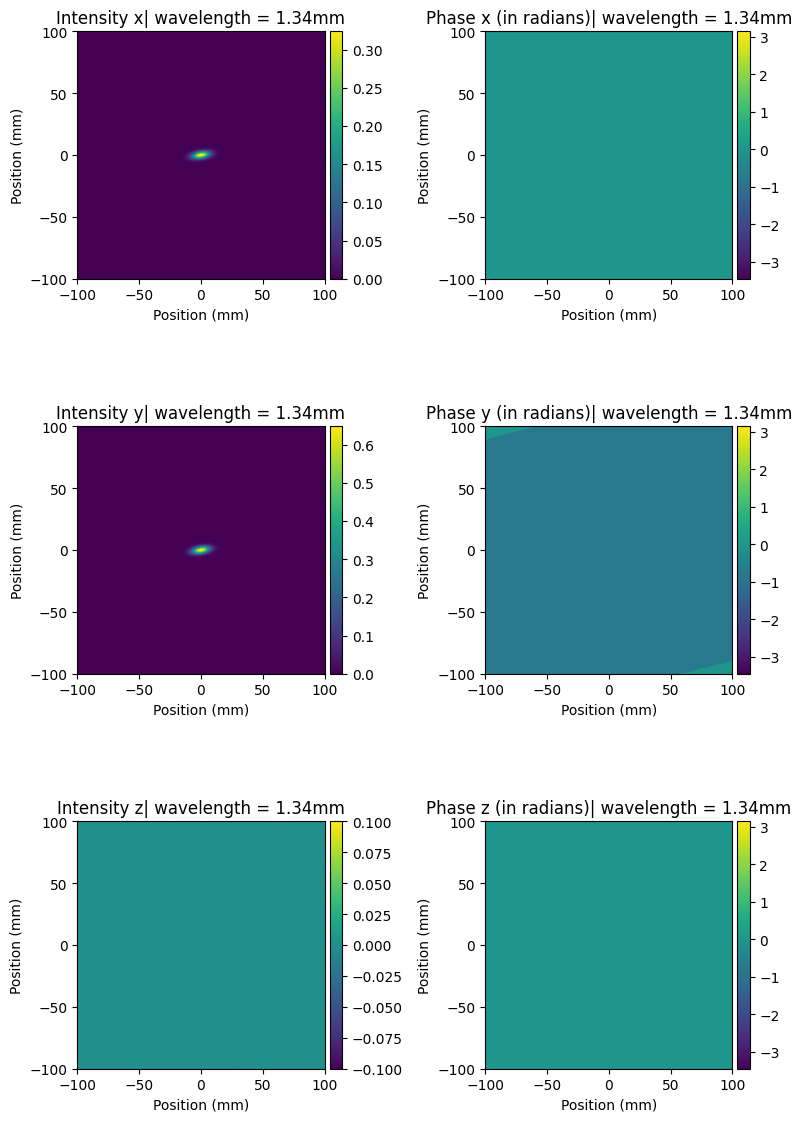

In [4]:
out.visualize(wavelength=wavelengths[1], figsize=(8, 12))

In [5]:
vrs_prop = VRS_prop(z_distance=800 * mm)
field_propagated = vrs_prop.forward(
    field = out
    )

Minimum propagation distance to satisfy energy conservation: 334.776 mm
Minimum propagation distance to satisfy sampling for FT: 389.250 mm
The simulation will be accurate !


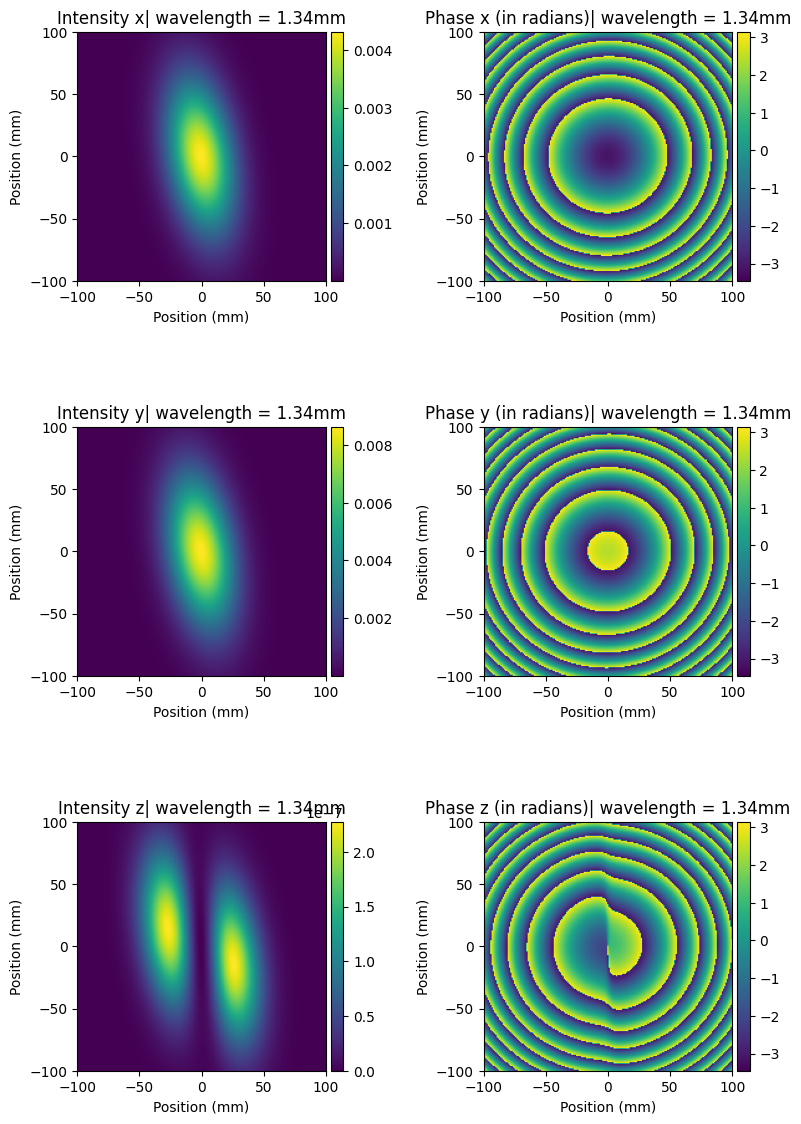

In [6]:
field_propagated.visualize(wavelength=wavelengths[1], figsize=(8, 12))

In [7]:
pa = PolarizationAnalyser(field_propagated)

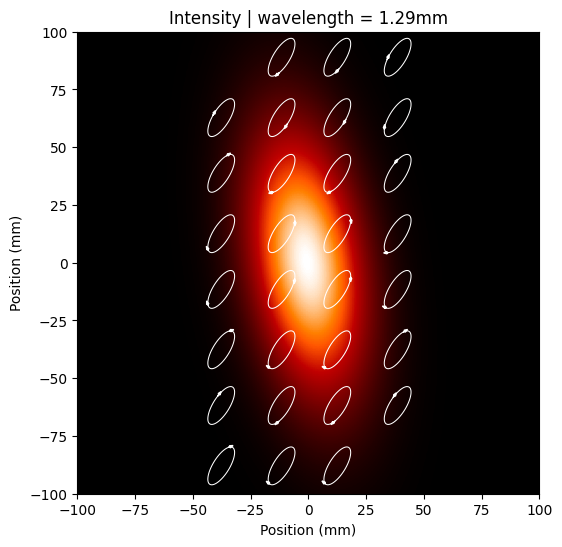

In [8]:
pa.analyze(wavelength=wavelengths[3], figsize=(6, 6), num_ellipses=(8, 8))